## Modules importation

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
## Importing different model classes from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
from joblib import dump, load

from sklearn.metrics import accuracy_score, classification_report

## Data Loading

In [6]:
data1 = pd.read_csv("../files/dataset1.csv")
data1.rename(columns={'N': 'n', 'P': 'p', 'K': 'k', 'pH': 'ph'}, inplace=True)
data1 = data1.drop(columns=['EC','OC','S','Zn','Fe','Cu','Mn','B'])
data1

,n,p,k,ph,Output
0,138,8.6,560,7.46,0
1,213,7.5,338,7.62,0
2,163,9.6,718,7.59,0
3,157,6.8,475,7.64,0
4,270,9.9,444,7.63,1
...,...,...,...,...,...
875,351,10.7,623,7.96,1
876,264,9.0,486,7.24,1
877,276,9.2,370,7.62,1
878,320,13.8,391,7.38,2


In [8]:
data2 = pd.read_csv("../files/Crop.csv")
data2.rename(columns={'N': 'n', 'P': 'p', 'K': 'k'}, inplace=True)
data2 = data2.drop(columns=['rainfall','label'])

data2

,n,p,k,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473
...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064
2196,99,15,27,27.417112,56.636362,6.086922
2197,118,33,30,24.131797,67.225123,6.362608
2198,117,32,34,26.272418,52.127394,6.758793


## Data Analysis

In [9]:
data = pd.merge(data1, data2, on=['n','p','k','ph'],how="outer")
data 

C:\Users\princ\AppData\Local\Temp\ipykernel_23108\3526756300.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  data = pd.merge(data1, data2, on=['n','p','k','ph'],how="outer")


,n,p,k,ph,Output,temperature,humidity
0,0,5.0,36,6.152907,NaN,24.351938,90.886124
1,0,12.0,7,6.969250,NaN,20.184323,90.654585
2,0,17.0,30,6.279134,NaN,35.474783,47.972305
3,0,17.0,42,6.859841,NaN,23.202426,91.194427
4,0,18.0,14,7.207991,NaN,29.771494,92.007200
...,...,...,...,...,...,...,...
3075,377,8.1,549,7.500000,1.0,NaN,NaN
3076,377,8.6,549,8.100000,1.0,NaN,NaN
3077,377,11.2,623,7.800000,2.0,NaN,NaN
3078,383,14.0,718,7.800000,2.0,NaN,NaN


In [10]:
data.describe()

,n,p,k,ph,Output,temperature,humidity
count,3080.000000,3080.000000,3080.000000,3080.000000,880.000000,2200.000000,2200.000000
mean,106.604870,42.276851,177.243182,6.766914,0.588636,25.616244,71.481779
std,102.667144,34.959990,218.893047,0.843049,0.575462,5.063749,22.263812
min,0.000000,2.900000,5.000000,0.900000,0.000000,8.825675,14.258040
25%,27.000000,10.300000,23.000000,6.158611,0.000000,22.769375,60.261953
50%,74.000000,37.000000,45.000000,6.802367,1.000000,25.598693,80.473146
75%,157.000000,62.000000,359.000000,7.420000,1.000000,28.561654,89.948771
max,383.000000,145.000000,887.000000,11.150000,2.000000,43.675493,99.981876


## Data Pre-processing

In [11]:
(data.Output.value_counts(normalize=True)*100)

Output
1.0    50.000000
0.0    45.568182
2.0     4.431818
Name: proportion, dtype: float64

In [12]:
(data.temperature.value_counts(normalize=True)*100)

temperature
24.351938    0.045455
36.322681    0.045455
23.058049    0.045455
23.641248    0.045455
25.371227    0.045455
               ...   
21.413638    0.045455
22.445170    0.045455
22.191094    0.045455
17.084985    0.045455
25.530827    0.045455
Name: proportion, Length: 2200, dtype: float64

In [13]:
(data.humidity.value_counts(normalize=True)*100)

humidity
90.886124    0.045455
93.061344    0.045455
83.370118    0.045455
80.285979    0.045455
76.240367    0.045455
               ...   
92.991245    0.045455
94.737635    0.045455
90.025751    0.045455
16.145658    0.045455
80.046628    0.045455
Name: proportion, Length: 2200, dtype: float64

In [14]:
data.temperature = data.temperature.fillna(data.temperature.mean())
data.humidity = data.humidity.fillna(data.humidity.median())

In [15]:
data = data.dropna()

In [16]:
data

,n,p,k,ph,Output,temperature,humidity
148,6,5.0,465,7.47,0.0,25.616244,80.473146
150,6,7.2,285,7.42,0.0,25.616244,80.473146
151,6,7.5,412,7.40,0.0,25.616244,80.473146
340,13,8.3,644,7.50,0.0,25.616244,80.473146
482,19,5.3,708,7.38,0.0,25.616244,80.473146
...,...,...,...,...,...,...,...
3075,377,8.1,549,7.50,1.0,25.616244,80.473146
3076,377,8.6,549,8.10,1.0,25.616244,80.473146
3077,377,11.2,623,7.80,2.0,25.616244,80.473146
3078,383,14.0,718,7.80,2.0,25.616244,80.473146


*************************************************

*************************************************

In [18]:
data3 = pd.read_csv("../files/dataset2.csv")
data3

,time,n,p,k,soiltemp,soilmoisture,temperature,humidity irrigation
0,6.90,24,104,30,30.19,9,35.0,95 on
1,11.48,25,104,31,30.19,10,34.0,95 on
2,13.76,24,103,29,30.25,13,35.0,95 on
3,18.34,24,104,30,30.31,10,35.0,95 on
4,22.91,25,104,30,30.44,12,36.0,95 on
...,...,...,...,...,...,...,...,...
97,494.05,34,107,38,28.75,5,29.0,95 on
98,507.77,32,107,38,28.69,7,29.0,95 on
99,523.78,31,107,37,28.62,5,28.0,95 on
100,528.36,31,106,37,28.56,1,29.0,95 on


In [19]:
# Specify the columns you want to select
selected_columns = ['n', 'p', 'k', 'soilmoisture']

# Create a new DataFrame with the selected columns
data4 = data3[selected_columns]
data4

,n,p,k,soilmoisture
0,24,104,30,9
1,25,104,31,10
2,24,103,29,13
3,24,104,30,10
4,25,104,30,12
...,...,...,...,...
97,34,107,38,5
98,32,107,38,7
99,31,107,37,5
100,31,106,37,1


In [20]:
df = pd.merge(data, data4, on=['n','p','k'],how="outer")
df

C:\Users\princ\AppData\Local\Temp\ipykernel_23108\3271401676.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = pd.merge(data, data4, on=['n','p','k'],how="outer")


,n,p,k,ph,Output,temperature,humidity,soilmoisture
0,6,5.0,465,7.47,0.0,25.616244,80.473146,NaN
1,6,7.2,285,7.42,0.0,25.616244,80.473146,NaN
2,6,7.5,412,7.40,0.0,25.616244,80.473146,NaN
3,11,98.0,18,NaN,NaN,NaN,NaN,6.0
4,12,99.0,18,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...
977,377,8.1,549,7.50,1.0,25.616244,80.473146,NaN
978,377,8.6,549,8.10,1.0,25.616244,80.473146,NaN
979,377,11.2,623,7.80,2.0,25.616244,80.473146,NaN
980,383,14.0,718,7.80,2.0,25.616244,80.473146,NaN


In [21]:
df.soilmoisture.value_counts(normalize=True)*100

soilmoisture
5.0     13.725490
4.0     11.764706
10.0    10.784314
8.0     10.784314
7.0      7.843137
13.0     6.862745
11.0     6.862745
3.0      6.862745
12.0     4.901961
6.0      3.921569
9.0      3.921569
2.0      3.921569
14.0     2.941176
15.0     1.960784
1.0      1.960784
0.0      0.980392
Name: proportion, dtype: float64

In [22]:
df.describe()

,n,p,k,ph,Output,temperature,humidity,soilmoisture
count,982.000000,982.000000,982.000000,880.000000,880.000000,880.000000,8.800000e+02,102.000000
mean,226.336049,24.970163,453.847251,7.510500,0.588636,25.616244,8.047315e+01,7.480392
std,94.842050,37.070031,179.552545,0.464912,0.575462,0.000000,1.421894e-14,3.679567
min,6.000000,2.900000,11.000000,0.900000,0.000000,25.616244,8.047315e+01,0.000000
25%,182.000000,7.000000,380.000000,7.350000,0.000000,25.616244,8.047315e+01,4.250000
50%,238.000000,8.300000,454.000000,7.500000,1.000000,25.616244,8.047315e+01,7.000000
75%,301.000000,12.700000,560.000000,7.630000,1.000000,25.616244,8.047315e+01,10.000000
max,383.000000,125.000000,887.000000,11.150000,2.000000,25.616244,8.047315e+01,15.000000


In [23]:
df.ph.value_counts(normalize=True)*100

ph
7.50     6.818182
7.40     6.250000
7.60     5.340909
7.90     3.863636
7.30     3.636364
           ...   
8.12     0.113636
6.96     0.113636
8.23     0.113636
9.97     0.113636
11.15    0.113636
Name: proportion, Length: 107, dtype: float64

In [24]:
df.soilmoisture = df.soilmoisture.fillna(df.soilmoisture.median())
df

,n,p,k,ph,Output,temperature,humidity,soilmoisture
0,6,5.0,465,7.47,0.0,25.616244,80.473146,7.0
1,6,7.2,285,7.42,0.0,25.616244,80.473146,7.0
2,6,7.5,412,7.40,0.0,25.616244,80.473146,7.0
3,11,98.0,18,NaN,NaN,NaN,NaN,6.0
4,12,99.0,18,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...
977,377,8.1,549,7.50,1.0,25.616244,80.473146,7.0
978,377,8.6,549,8.10,1.0,25.616244,80.473146,7.0
979,377,11.2,623,7.80,2.0,25.616244,80.473146,7.0
980,383,14.0,718,7.80,2.0,25.616244,80.473146,7.0


In [25]:
df.temperature = df.temperature.fillna(df.temperature.mean())
df.humidity = df.humidity.fillna(df.humidity.median())
df.Output = df.Output.fillna(df.Output.median())
df.ph = df.ph.fillna(df.ph.median())

In [26]:
df

,n,p,k,ph,Output,temperature,humidity,soilmoisture
0,6,5.0,465,7.47,0.0,25.616244,80.473146,7.0
1,6,7.2,285,7.42,0.0,25.616244,80.473146,7.0
2,6,7.5,412,7.40,0.0,25.616244,80.473146,7.0
3,11,98.0,18,7.50,1.0,25.616244,80.473146,6.0
4,12,99.0,18,7.50,1.0,25.616244,80.473146,5.0
...,...,...,...,...,...,...,...,...
977,377,8.1,549,7.50,1.0,25.616244,80.473146,7.0
978,377,8.6,549,8.10,1.0,25.616244,80.473146,7.0
979,377,11.2,623,7.80,2.0,25.616244,80.473146,7.0
980,383,14.0,718,7.80,2.0,25.616244,80.473146,7.0


In [27]:
df.describe()

,n,p,k,ph,Output,temperature,humidity,soilmoisture
count,982.000000,982.000000,982.000000,982.000000,982.000000,9.820000e+02,9.820000e+02,982.000000
mean,226.336049,24.970163,453.847251,7.509409,0.631365,2.561624e+01,8.047315e+01,7.049898
std,94.842050,37.070031,179.552545,0.440091,0.559009,3.554524e-15,2.843619e-14,1.189726
min,6.000000,2.900000,11.000000,0.900000,0.000000,2.561624e+01,8.047315e+01,0.000000
25%,182.000000,7.000000,380.000000,7.380000,0.000000,2.561624e+01,8.047315e+01,7.000000
50%,238.000000,8.300000,454.000000,7.500000,1.000000,2.561624e+01,8.047315e+01,7.000000
75%,301.000000,12.700000,560.000000,7.620000,1.000000,2.561624e+01,8.047315e+01,7.000000
max,383.000000,125.000000,887.000000,11.150000,2.000000,2.561624e+01,8.047315e+01,15.000000


***************************************

***************************************

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n             982 non-null    int64  
 1   p             982 non-null    float64
 2   k             982 non-null    int64  
 3   ph            982 non-null    float64
 4   Output        982 non-null    float64
 5   temperature   982 non-null    float64
 6   humidity      982 non-null    float64
 7   soilmoisture  982 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 61.5 KB


In [29]:
df.isna().sum()

n               0
p               0
k               0
ph              0
Output          0
temperature     0
humidity        0
soilmoisture    0
dtype: int64

***************************************

## Data Visualization

In [30]:
df.hist(figsize=(15,10))
plt.show()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

In [31]:
sns.countplot(x=df['Output'], data=df)

plt.show()

NameError: name 'sns' is not defined

## Data Sampling

In [32]:
X = df.drop(columns=['Output'])
y = df['Output']

## Data Normalization

In [33]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.1,random_state=101)

***************************************

## Model training

## Random forest

In [35]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train,y_train)
rf_pred = rfclassifier.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Accuracy score:",rf_accuracy)

Accuracy score: 0.8888888888888888


In [36]:
print("Classification Report:\n",classification_report(y_test,rf_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        38
         1.0       0.91      0.89      0.90        56
         2.0       1.00      0.20      0.33         5

    accuracy                           0.89        99
   macro avg       0.92      0.69      0.72        99
weighted avg       0.90      0.89      0.88        99



***************************************

## Decision Tree

In [37]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train,y_train)
dt_pred = dtclassifier.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
print("Accuracy score:",dt_accuracy)

Accuracy score: 0.898989898989899


In [38]:
print("Classification Report:\n",classification_report(y_test,dt_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        38
         1.0       0.93      0.89      0.91        56
         2.0       1.00      0.40      0.57         5

    accuracy                           0.90        99
   macro avg       0.93      0.76      0.80        99
weighted avg       0.90      0.90      0.89        99



***************************************

## Adaboost

In [39]:
adclassifier = AdaBoostClassifier()
adclassifier.fit(X_train,y_train)
ad_pred = adclassifier.predict(X_test)
ad_accuracy = accuracy_score(y_test,ad_pred)
print("Accuracy score:",ad_accuracy)

Accuracy score: 0.7474747474747475


c:\Users\princ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [40]:
print("Classification Report:\n",classification_report(y_test,ad_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.78        38
         1.0       0.84      0.68      0.75        56
         2.0       0.50      0.20      0.29         5

    accuracy                           0.75        99
   macro avg       0.67      0.60      0.61        99
weighted avg       0.76      0.75      0.74        99



***************************************

## Gradient Boosting

In [41]:
gbclassifier = GradientBoostingClassifier()
gbclassifier.fit(X_train,y_train)
gb_pred = gbclassifier.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print("Accuracy score:",gb_accuracy)

Accuracy score: 0.8888888888888888


In [42]:
print("Classification Report:\n",classification_report(y_test,gb_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91        38
         1.0       0.91      0.89      0.90        56
         2.0       1.00      0.20      0.33         5

    accuracy                           0.89        99
   macro avg       0.92      0.69      0.72        99
weighted avg       0.90      0.89      0.88        99



***************************************

***************************************

## Model comparison

[89.8989898989899, 84.84848484848484, 84.84848484848484, 87.87878787878788]


Text(0.5, 1.0, 'Accuracy score Comparison (Higher is better)')

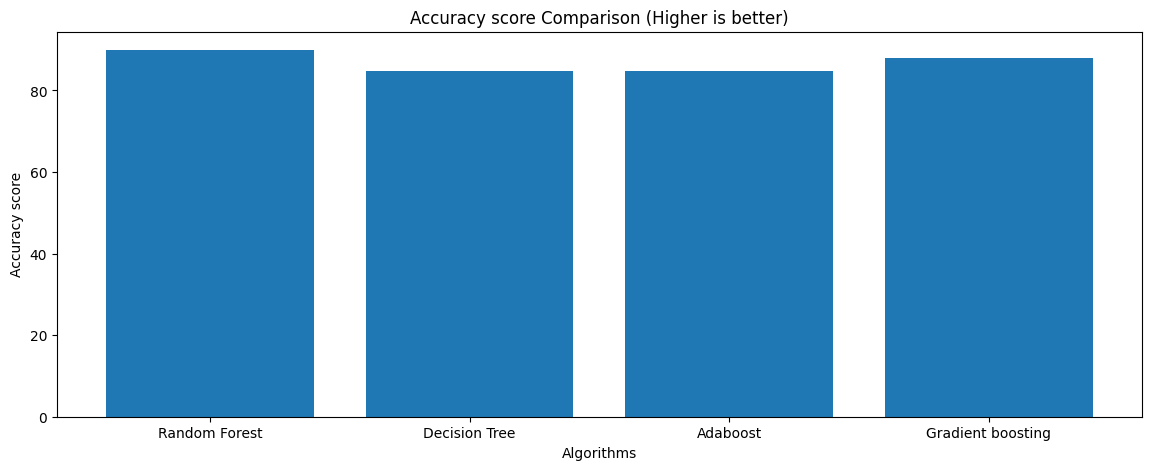

In [ ]:
algorithms = ["Random Forest","Decision Tree","Adaboost","Gradient boosting"]
Accuracy = [rf_accuracy*100,dt_accuracy*100,ad_accuracy*100,gb_accuracy*100]
print(Accuracy)

plt.figure(figsize=[14,5])
plt.bar(algorithms, Accuracy)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Accuracy score Comparison (Higher is better)")

***************************************

***************************************

## Saving best performing model

In [43]:
dump(scaler, '../files/scaler.joblib')
dump(rfclassifier, '../files/RandomForest.joblib')

['../files/RandomForest.joblib']

In [44]:
# # Save the model to a file using pickle
# with open('files/RandomForest.pkl', 'wb') as file:
#     pickle.dump(rfclassifier, file)

***************************************

***************************************

## Detecting the soil quality

In [ ]:
def predict_soil_quality(input):

    # Load the model from the file
    # with open('files/RandomForest.joblib', 'rb') as file:
    #     loaded_model = pickle.load(file)

    # with open('files/scaler.joblib', 'rb') as file:
    #     scaler = pickle.load(file)
    
    loaded_model = load("files/RandomForest.joblib")
    scaler = load("files/scaler.joblib")

    scaled = scaler.transform([input])
    prediction = loaded_model.predict(scaled)
    if prediction == [0]:
        return "Average Quality"
    if prediction == [1]:
        return "Good Quality"
    if prediction == [2]:
        return "Very Good Quality"
    

predict_soil_quality([138,8.6,560,7.46,25.616244,80.473146,7.0])

'Average Quality'

In [ ]:
predict_soil_quality([276,9.2,370,7.62,25.616244,80.473146,7.0])

'Good Quality'

***************************************

In [ ]:
predict_soil_quality([138,5.3,444,7.68,25.616244,80.473146,1.0])

'Very Good Quality'